In [ ]:
from google.colab import files
files.upload()

In [10]:
import pandas as pd
df=pd.read_csv("/content/zomato.csv", engine='python', encoding = "ISO-8859-1")

In [12]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [13]:
df.shape

(9551, 21)

In [14]:
nan_values = df.isna()
nan_columns = nan_values.any()
# Checking if any column contains the null values and adding that column to a list
columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


In [ ]:
files.upload()

In [20]:
df1=pd.read_excel("/content/Country-Code.xlsx")

In [21]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [23]:
print('List of countries the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print('Total number of countries are', len(pd.unique(df2.Country)))

List of countries the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey
Total number of countries are 15


In [24]:
labels = list(df2.Country.value_counts().index)
print(labels)
values = list(df2.Country.value_counts().values)
values

['India', 'United States', 'United Kingdom', 'Brazil', 'UAE', 'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada']


[8652, 434, 80, 60, 60, 60, 40, 34, 24, 22, 21, 20, 20, 20, 4]

In [25]:
from plotly.offline import init_notebook_mode, plot, iplot

#labels = list(df2.Country.value_counts().index)
#values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

In [26]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


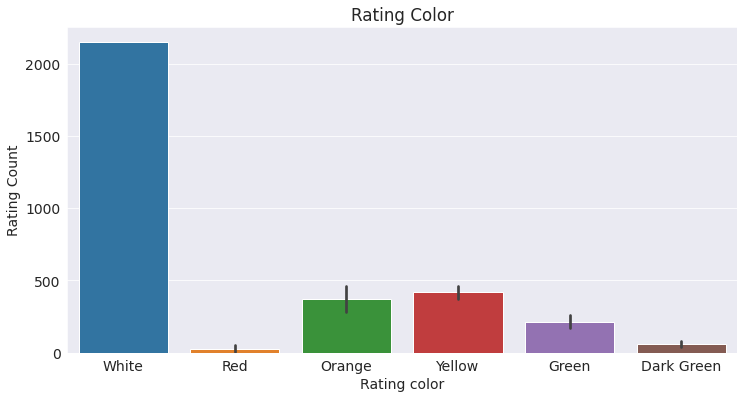

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

In [28]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


([<matplotlib.patches.Wedge at 0x7f0549daab90>,
 [Text(0.7614681082348078, -0.7938301582462733, 'No'),
  Text(-0.7614681825585475, 0.7938300869524804, 'Yes')],
 [Text(0.41534624085534966, -0.43299826813433084, '74.3%'),
  Text(-0.41534628139557134, 0.4329982292468075, '25.7%')])

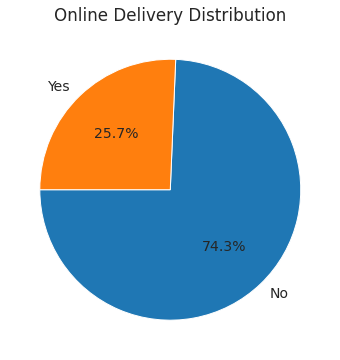

In [29]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180)

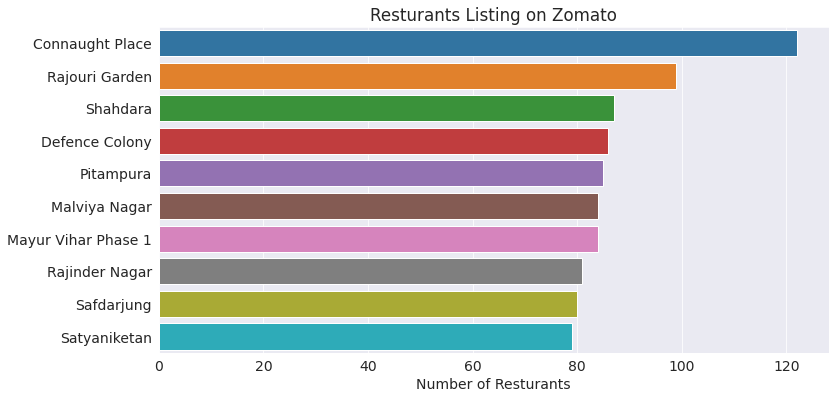

In [31]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

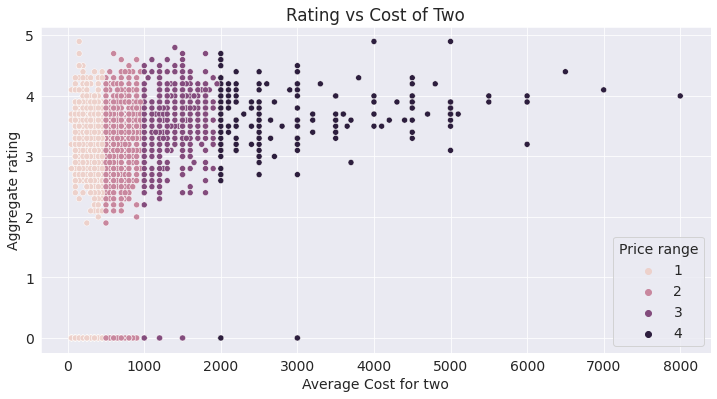

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');